In [4]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
MAX_TOWERS = 6
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import random

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error
from scipy.sparse import hstack 
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import math

/home/snake/anaconda3/envs/myenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/snake/anaconda3/envs/myenv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/snake/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
def get_train():
    train_main = pd.read_csv("../data/task1/train_1.8.csv", encoding="cp1251")
    train_aux_coords = pd.read_csv("../data/task1_additional/coords_train_1.1.csv", encoding="cp1251")
    train_aux_frac = pd.read_csv("../data/task1_additional/frac_train_1.csv", encoding="cp1251")
    train_aux_gdis = pd.read_csv("../data/task1_additional/gdis_train1.2.csv", encoding="cp1251")
    
    
    train_frac_main = pd.merge(train_main, train_aux_frac,how="left", left_on="Скважина", right_on="Скважина")
    train_main_frac_gdis = pd.merge(train_frac_main, train_aux_gdis,how="left", left_on="Скважина", right_on="Скважина")
    all_recs = pd.merge(train_main_frac_gdis,  train_aux_coords, how="left", left_on="Скважина", right_on="well_hash")
    final_recs = all_recs.drop(["well_hash"], axis=1)
    return final_recs

def get_test():
    test_main = pd.read_csv("../data/task1/test_1.9.csv", encoding="cp1251")
    test_aux_coords = pd.read_csv("../data/task1_additional/coords_train_1.1.csv", encoding="cp1251")
    test_aux_frac = pd.read_csv("../data/task1_additional/frac_test_1.csv", encoding="cp1251")
    test_aux_gdis = pd.read_csv("../data/task1_additional/gdis_test1.2.csv", encoding="cp1251")
    
    
    test_frac_main = pd.merge(test_main, test_aux_frac,how="left", left_on="Скважина", right_on="Скважина")
    test_main_frac_gdis = pd.merge(test_frac_main, test_aux_gdis,how="left", left_on="Скважина", right_on="Скважина")
    all_recs = pd.merge(test_main_frac_gdis, test_aux_coords, how="left", left_on="Скважина", right_on="well_hash")
    final_recs = all_recs.drop(["well_hash"], axis=1)
    return final_recs

In [6]:
train = get_train()

In [7]:
def get_float(v):
    v = str(v)
    if v != "NaN":
        new = v.replace(",",".")
        return float(new)
    return v

def get_y(data):
    return data["Нефть, т"].apply(get_float)

In [8]:
y_train = get_y(train)

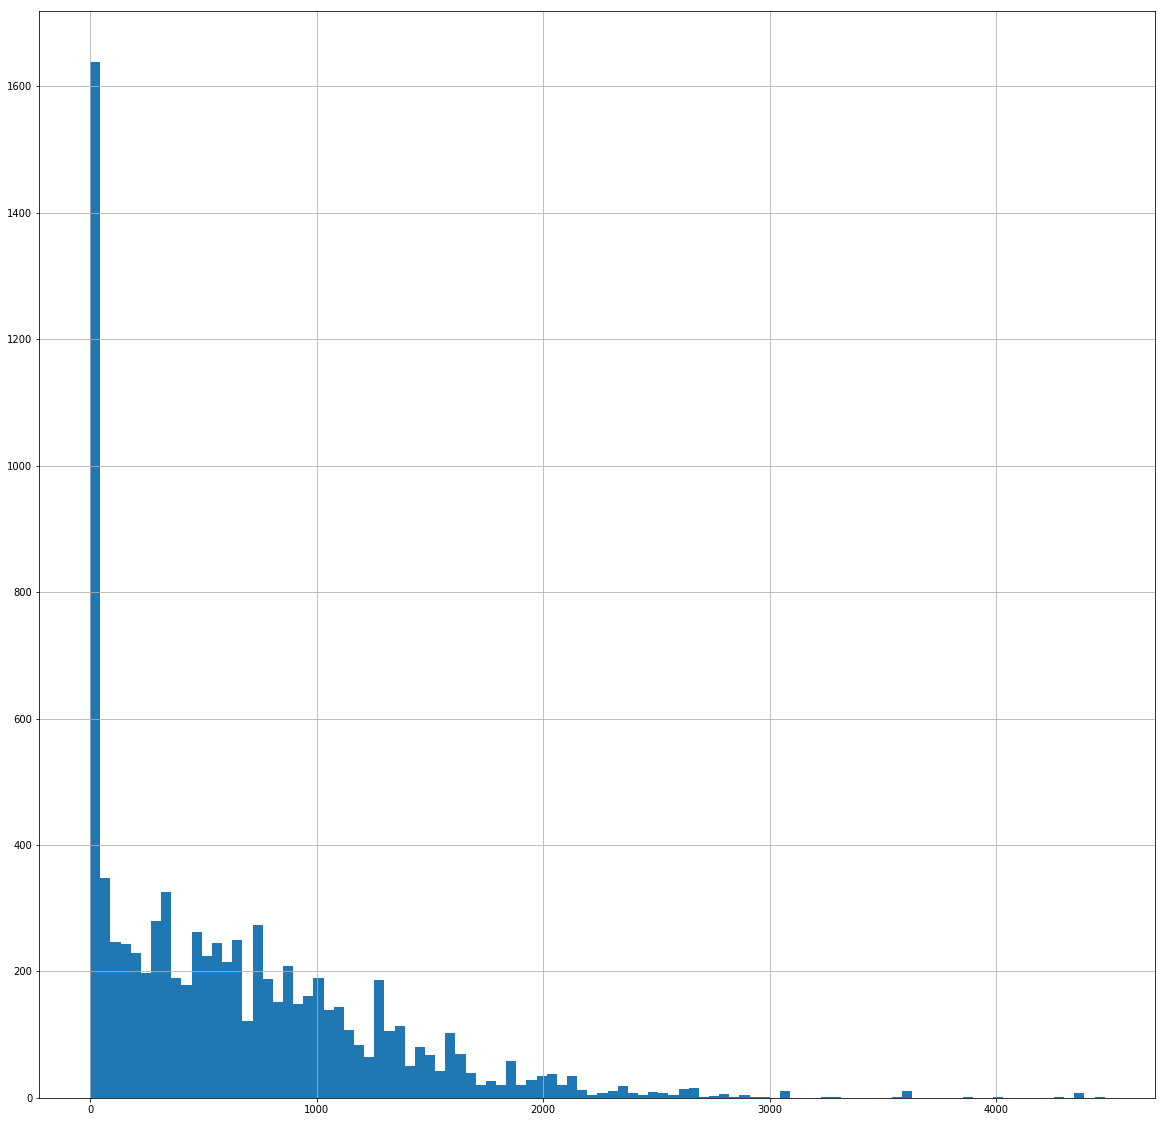

In [11]:
y_train.hist(bins=100, figsize=(20,20))

In [37]:
len(y_train[y_train==0])

1267

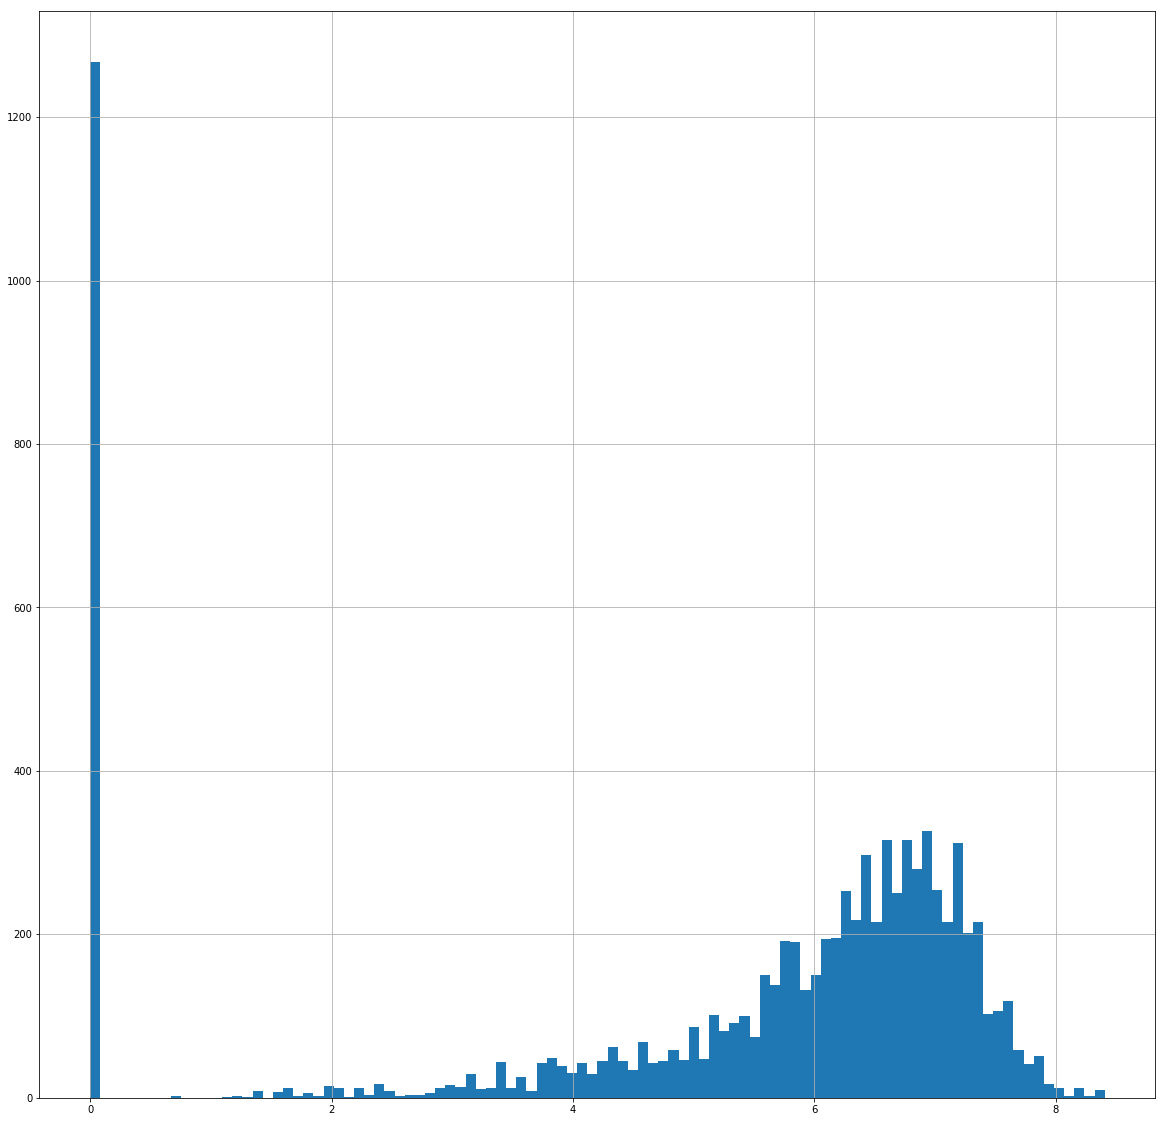

In [33]:
y_train.apply(np.log1p).hist(bins=100,figsize=(20,20))

In [15]:
len(y_train[y_train==0])/len(y_train)

0.14116991643454038

In [14]:
train[y_train==0]

Скважина        Дата  ГТМ Метод Характер работы  \
24    8f3131afe66d3266c23142786786b265  2014-05-01  1.0   ФОН             НЕФ   
25    8f3131afe66d3266c23142786786b265  2014-05-01  1.0   ФОН             НЕФ   
90    db9947ee0fbc7f53447ab68bca6af0a1  2011-10-01  0.0   ФОН             НЕФ   
180   5a4202dcf17adc169ba49fb8dcd29072  2010-03-31  1.0   ФОН             НЕФ   
181   5a4202dcf17adc169ba49fb8dcd29072  2010-03-31  1.0   ФОН             НЕФ   
182   5a4202dcf17adc169ba49fb8dcd29072  2010-03-31  1.0   ФОН             НЕФ   
183   5a4202dcf17adc169ba49fb8dcd29072  2010-03-31  1.0   ФОН             НЕФ   
184   5a4202dcf17adc169ba49fb8dcd29072  2010-03-31  1.0   ФОН             НЕФ   
185   5a4202dcf17adc169ba49fb8dcd29072  2010-03-31  1.0   ФОН             НЕФ   
216   e601d74a6d367d4bf0fb74216adb95b5  2010-03-01  1.0   ФОН             НЕФ   
217   e601d74a6d367d4bf0fb74216adb95b5  2010-03-01  1.0   ФОН             НЕФ   
228   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
229   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
230   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
231   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
232   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
233   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
234   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
235   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
236   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
237   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
238   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
239   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
240   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
241   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
242   f63abcb03598c7026c30a5e15c5f79fe  2009-08-31  0.0   ФОН             НЕФ   
354   376092d0125ed4345b8882d332f005c9  2009-05-01  1.0   ФОН             НЕФ   
355   376092d0125ed4345b8882d332f005c9  2009-05-01  1.0   ФОН             НЕФ   
366   f100d48d4b0b7d98cb5f17ae5dd6506c  2009-05-31  1.0   ФОН             НЕФ   
367   f100d48d4b0b7d98cb5f17ae5dd6506c  2009-05-31  1.0   ФОН             НЕФ   
414   80e7e02703c102858eabdc9fe3b9bd17  2008-08-30  1.0   ФОН             НЕФ   
415   80e7e02703c102858eabdc9fe3b9bd17  2008-08-30  1.0   ФОН             НЕФ   
416   80e7e02703c102858eabdc9fe3b9bd17  2008-08-30  1.0   ФОН             НЕФ   
417   80e7e02703c102858eabdc9fe3b9bd17  2008-08-30  1.0   ФОН             НЕФ   
418   80e7e02703c102858eabdc9fe3b9bd17  2008-08-30  1.0   ФОН             НЕФ   
419   80e7e02703c102858eabdc9fe3b9bd17  2008-08-30  1.0   ФОН             НЕФ   
450   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
451   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
452   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
453   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
454   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
455   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
456   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
457   a4ab7c0046095d0edaa9912a70bd9a24  2009-03-01  0.0   ФОН             НЕФ   
498   8b6c2950e9411bab171d55c1c800845c  2009-05-01  1.0   ФОН             НЕФ   
499   8b6c2950e9411bab171d55c1c800845c  2009-05-01  1.0   ФОН             НЕФ   
500   8b6c2950e9411bab171d55c1c800845c  2009-05-01  1.0   ФОН             НЕФ   
501   8b6c2950e9411bab171d55c1c800845c  2009-05-01  1.0   ФОН             НЕФ   
502   8b6c2950e9411bab171d55c1c800845c  2009-05-01  1.0   ФОН

In [18]:
len(train[train["Состояние"]=='ОСВ ТГ'])

882

In [19]:
train[y_train==0]["Состояние"].unique()

array(['ОСВ ТГ', 'РАБ.', 'ОСТ.', 'Б/Д ТГ', nan, 'ОЖ ОСВ ТГ', 'ПЬЕЗ',
       'Б/Д ПР Л', 'ОСВ ПР ЛЕТ'], dtype=object)